# 7. Outliers 异常值
异常值主要通过两种方式影响 Prophet 预测结果。下面我们使用之前使用过的 R 语言维基百科主页对数访问量的数据来建模预测，只不过使用存在时间间隔并不完整的数据，即不是每日的数字都有且按时间有序排列

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


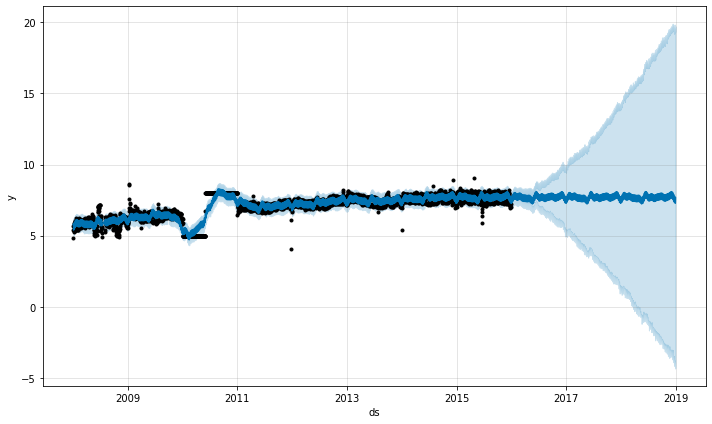

In [4]:
from fbprophet import Prophet
import pandas as pd


df = pd.read_csv('examples/example_wp_log_R_outliers1.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1096)
forecast = m.predict(future)
pd.plotting.register_matplotlib_converters()
fig = m.plot(forecast)

如上输出图所示，**趋势预测看似合理，预测区间的估计却过于广泛**。 Prophet 虽能够处理历史数据中的异常值，但仅仅是将它们与趋势的变化拟合在一起，认为未来也会有类似的趋势变化。

处理异常值最好的方法是移除它们，而 Prophet 是能够处理缺失数据的。如果在历史数据中某行的值为空（ NA ），但是在待预测日期数据框 future 中仍保留这个日期，那么 Prophet 依旧可以给出该行的预测值。

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


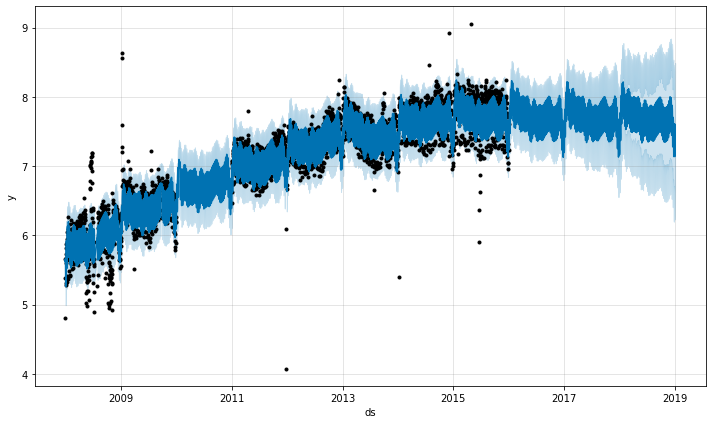

In [6]:
# 将2010年一年的数据设为缺失
df.loc[(df['ds'] > '2010-01-01') & (df['ds'] < '2011-01-01'), 'y'] = None
model = Prophet().fit(df)
fig2 = model.plot(model.predict(future))

上述这个实例虽然影响了不确定性的估计，却没有影响到主要的预测值 yhat 。但是，现实往往并非如此，接下来，在上述数据集基础上加入新的异常值后再建模预测：

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


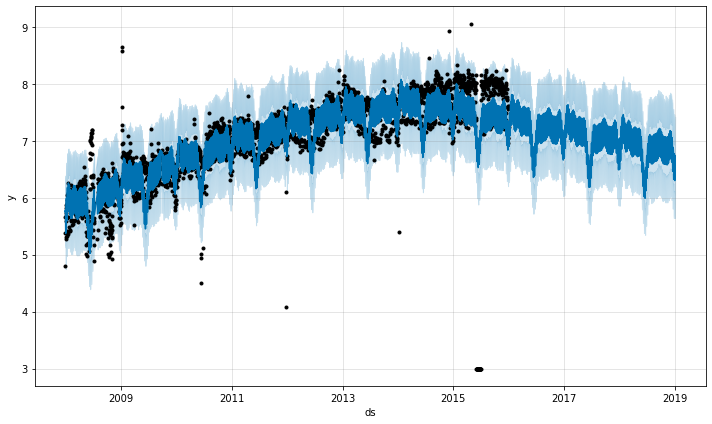

In [7]:
df = pd.read_csv('examples/example_wp_log_R_outliers2.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1096)
forecast = m.predict(future)
fig3 = m.plot(forecast)

这里 2015年 6 月存在一些异常值破坏了季节效应的估计，因此未来的预测也会永久地受到这个影响。最好的解决方法就是移除这些异常值：

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


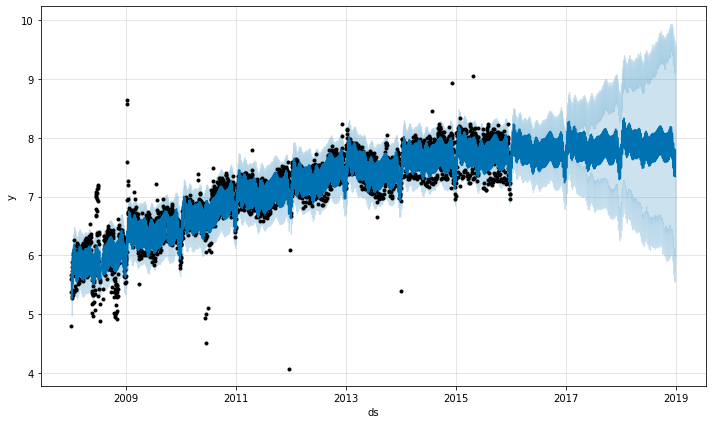

In [8]:
# 将2015年前半年的数据设为缺失
df.loc[(df['ds'] > '2015-06-01') & (df['ds'] < '2015-06-30'), 'y'] = None
m = Prophet().fit(df)
fig4 = m.plot(m.predict(future))

上面这个图中没看到2015年上半年的数据变成缺失了啊？？